Data Fields

- split: Train, Test split
- message: English text of actual messages related to disaster
- original: Text of column 3 in native language as originally written
- genre: Type of message, including direct messages, social posting, and news stories or bulletins
- related: Is the message disaster related? 1= yes, 0=no, 2=maybe
- PII: Does the message contain PII? 1= yes, 0=no
- request: Does the message contain a request? 1= yes, 0=no
- offer: Does the message contain an offer? 1= yes, 0=no
- aid_related: Is the message aid related? 1= yes, 0=no
- medical_help: Does the message concern medical help? 1= yes, 0=no
- medical_products: Does the message concern medical products? 1= yes, 0=no
- search_and_rescue: Does the message concern search and rescue? 1= yes, 0=no
- security: Does the message concern security? 1= yes, 0=no
- military: Does the message concern military? 1= yes, 0=no
- child_alone: Does the message mention a child alone? 1= yes, 0=no
- water: Does the message concern water? 1= yes, 0=no
- food: Does the message concern food? 1= yes, 0=no
- shelter: Does the message concern shelter? 1= yes, 0=no
- clothing: Does the message concern clothing? 1= yes, 0=no
- money: Does the message concern money? 1= yes, 0=no
- missing_people: Does the message indicate missing people? 1= yes, 0=no
- refugees: Does the message concern refugess? 1= yes, 0=no
- death: Does the message imply death? 1= yes, 0=no
- other_aid: Is there any other aid needed? 1=yes, 0=no
- infrastructure_related: Does the message concern infrastructure? 1= yes, 0=no
- transport: Does the message concern transport? 1= yes, 0=no
- buildings: Does the message concern buildings? 1= yes, 0=no
- electricity: Does the message concern electricity? 1= yes, 0=no
- tools: Does the message concern tools? 1= yes, 0=no
- hospitals: Does the message concern clothing? 1= yes, 0=no
- shops: Does the message concern clothing? 1= yes, 0=no
- aid_centers:Does the message concern clothing? 1= yes, 0=no
- other_infrastructure:Does the message concern clothing? 1= yes, 0=no
- weather_related: Does the message concern weather? 1= yes, 0=no
- floods: Does the message indicate there was a flood? 1= yes, 0=no
- storm: Does the message indicate there was a storm? 1= yes, 0=no
- fire: Does the message indicate there was a fire? 1= yes, 0=no
- earthquake: Does the message indicate there was an earthquake? 1= yes, 0=no
- cold: Does the message indicate there was a cold? 1= yes, 0=no
- other_weather: Does the message indicate there was other weather issues? 1= yes, 0=no
- direct_report: Does the show a direct report? 1= yes, 0=no

***I. IMPORT DATA AND PREPARATION***

In [1]:
import pandas as pd

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
import re

In [5]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1574]:
df=pd.read_csv("Medical_Severity_Dataset_8.csv")
df.head(5)

,ID,Type,Message,Medical_severity
0,18,validation,I am in Croix-des-Bouquets. We have health iss...,1
1,38,validation,"People I'm at Delma 2, we don't anything what ...",1
2,39,test,We are at Gressier we needs assistance right a...,0
3,78,validation,How can we find help and food in fontamara 43 ...,0
4,118,validation,( im taking a guess at this sorry its a mix of...,1


In [1575]:
df = df.drop(['Type'], axis=1)

In [1576]:
df = df.drop_duplicates()

In [1577]:
# Split the data into training, validation, and test sets with a 80:10:10 ratio
# First split the data into a 90:10 ratio for the test set
df_train, df_test = train_test_split(df, test_size=0.25, random_state=42, stratify=df['Medical_severity'], shuffle=True)


In [1578]:
df_train.head()

,ID,Message,Medical_severity
1628,21850,If the residents of these camps are left once ...,0
940,29824,Boko Haram staged its most deadly assault on t...,1
1991,134,I woul like to know if aide is only available ...,0
872,16870,Rescue workers said the death toll could rise ...,0
577,26601,Soliders and health officials stepped up anti-...,1


In [1579]:
df_test.head()

,ID,Message,Medical_severity
1426,19714,"Early in the morning on January 17, Mount Nyir...",0
1620,21784,"Some 500,000 people were evacuated because of ...",1
204,4362,"Good evening, I am in Leogane in a temporary S...",0
190,4205,requesting power and financial support for vic...,0
350,7148,Is Latortue not in Haiti. We've gotten no help...,0


In [1580]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)

In [1581]:
pd.value_counts(df_train['Medical_severity'])

Medical_severity
0    961
1    601
Name: count, dtype: int64

In [1582]:
pd.value_counts(df_test['Medical_severity'])

Medical_severity
0    321
1    200
Name: count, dtype: int64

In [1583]:
def join_words(words_list):
    return ' '.join(words_list)

In [1584]:
#Set up stop words for removal
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords
stop_words=stopwords.words("english")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1585]:
list_of_stop_words=["the", "has", "it", "with", "were", "can", "of","to","on", "this", "about", "that","was", "also",
                    "http", "are","is", "am","some", "about","a", "an", "which", "what", "how", "when", "who","this",
                    "that","are", "the", "to", "we", "have", "in", "you", "with", "of", "what", "be", "as", "has", "from",
                    "by", "that", "am","people","know","dont","also","would","people","please","like","would","People",
                    "Know","need","Need","Also","Like","Would","Dont","take","make","tell","well","many","Many","want",
                    "Want","cause","still","since","give","year","include","problem","place","region","number","find",
                    "provide","come","can","could","may","might","area","affect","world","person","part","thank",
                    "thanks","haiti", "information", "good", "anything", "nothing", "time","help","country","report",
                    "can","cant","cannot","can not","along","didnt","never","anymore",'havent',"without","others",
                    "natural","response","disaster","sandy","food","continue","something","even","already","continue",
                    'disaster',"much","last","year","month","week","already", "important", "concern", "morning", 
                    "haitian", "system", "leave", "friend", "mother", "back","lose","portauprince","assisstance",
                    "relief","risk","management","support","stay","livelihood","temporary","support","send","someone",
                    "somebody","portauprince","flood","water","hurricane","earthquake","storm","bitly","rain","never",
                    "anymore","without","sandy","food","response","something","even","didnt","much","especially","last",
                    "week","year","month","sent","send","receive","daily","inside","concern","already","temporary",
                    "government","message",'nothern','central','local','start','severly','bring','india','district','province','flooding',
                    'official','santiago',"will","help","need","cross","people","thank","still","said","last","help","people","u","will",
                    "information","several","anything","find","thank","want","area","said","including","need","team","work",
                    "live","lives","note","notes",'from','to','as','of','are','such','and','from','to','are','with','include','including',
                    'among','general','though','as','of','which','are','or','with','though','namely','also','a','an','against','food','water',
                    'people','will','people','will','need','many','area','said','u','current','situation','operation',"hello",
                    'really','trouble','bother','worry','info','please','we','case','fell','able','possibility','legally','initial','follow',
                   'kmhr', 'jaffna','wind','international','federation','crescent','societies','november','rainfall','cyclonic','septemberend','aedes','breeding','corps','ministry',
                    'supply','measure', 'richter', 'scale', 'united', 'nations', 'sierra', 'leone', 'banda', 'aceh', 'shelter',
                   'material', 'heavy', 'monsoon', 'health', 'south africa', 'indonesia', 'africa', 'tent']
#          
list_of_stop_words = list(set(list_of_stop_words))
stop_words.extend(list_of_stop_words)

In [1586]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())
    x = re.sub(r'\b\w{1,3}\b',' ',x)
    x = re.sub(r'\d+',' ', x)
    stop_words = list(stopwords.words('english'))
    stop_words.extend(list_of_stop_words)
    x = [w for w in x.split() if w not in stop_words]
    return ' '.join(x)

In [1587]:
#mapping pos tags
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [1588]:
#lemmatizing 
import string

def clean_text(text):
    text = [word.strip(string.punctuation) for word in text.split()]
    pos_tags = pos_tag(text)
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    text = " ".join(text)
    return(text)

In [1589]:
df_train=df_train.applymap(str)
df_test=df_test.applymap(str)

In [1590]:
df_train['message_cleaned']=df_train['Message'].apply(clean_text)
df_test['message_cleaned']=df_test['Message'].apply(clean_text)

df_train['message_cleaned']=df_train['message_cleaned'].apply(preprocess)
df_test['message_cleaned']=df_test['message_cleaned'].apply(preprocess)

II. FEATURE EXTRACTION

2.1 BAG-OR-WORDS

In [1591]:
# Create a CountVectorizer object and fit it on the "message" column of the train dataframe
count_vectorizer = CountVectorizer()
train_bow = count_vectorizer.fit_transform(df_train['message_cleaned'])

# fit count vectorizer of train data on the "message" column of the test dataframe
test_bow = count_vectorizer.transform(df_test['message_cleaned'])

In [1592]:
# Create a dictionary of word frequencies from the BoW matrix for train
bow_dict_train = dict(zip(count_vectorizer.get_feature_names_out(), train_bow.sum(axis=0).tolist()[0]))
# Create a dictionary of word frequencies from the BoW matrix for test
bow_dict_test = dict(zip(count_vectorizer.get_feature_names_out(), test_bow.sum(axis=0).tolist()[0]))


2.2 Word Cloud

In [1593]:
# Import wordcloud
from wordcloud import WordCloud

In [1594]:
import matplotlib.pyplot as plt

In [1595]:
# Create a word cloud
wordcloud_train = WordCloud(background_color="white").generate_from_frequencies(bow_dict_train)
wordcloud_test = WordCloud(background_color="white").generate_from_frequencies(bow_dict_test)

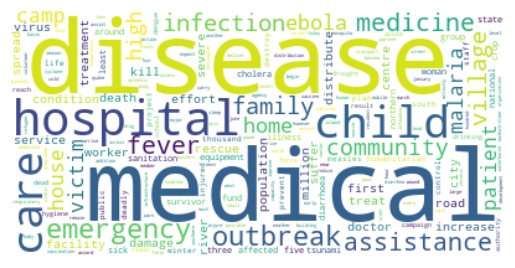

None

In [1596]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
display(plt.show())

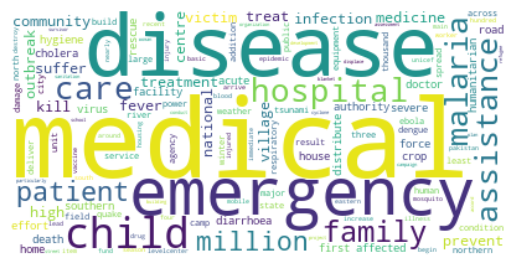

In [1597]:
# Test word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

2.3 TF-IDF

In [1598]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import TruncatedSVD

# Create a TfidfVectorizer object and fit it on the "message" column of the dataframe

tfidf_vectorizer = TfidfVectorizer(max_features=30)

tfidf_df_train_matrix = tfidf_vectorizer.fit_transform(df_train['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_train_matrix = pd.DataFrame(tfidf_df_train_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_train_matrix.fillna(value="", inplace=True)

In [1599]:
# fit trained vectorized on the "message" column of the dataframe
tfidf_df_test_matrix = tfidf_vectorizer.transform(df_test['message_cleaned'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df_test_matrix = pd.DataFrame(tfidf_df_test_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df_test_matrix.fillna(value="", inplace=True)

In [1600]:
tfidf_df_train_matrix.head()

,assistance,camp,care,child,community,condition,damage,disease,ebola,effort,...,infection,malaria,medical,medicine,outbreak,patient,rescue,service,victim,village
0,0.0,0.780425,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.474446,0.0,0.000000,0.0,0.660219,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.639402,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.768873,0.0,0.000000,0.0,0.0,0.0


In [1601]:
tfidf_df_test_matrix.head()

,assistance,camp,care,child,community,condition,damage,disease,ebola,effort,...,infection,malaria,medical,medicine,outbreak,patient,rescue,service,victim,village
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1602]:
tfidf_df_train_matrix['high'].sum()

33.40681804456904

In [1603]:
feature__names=list(tfidf_vectorizer.get_feature_names_out())

In [1604]:
# Extract the top N keywords for each document
N = 3
top_keywords_per_doc_train = []
for row in tfidf_df_train_matrix:
    doc_keywords_train = sorted(list(zip(tfidf_vectorizer.get_feature_names_out(), row)), key=lambda x: x[1], reverse=True)[:N]
    top_keywords_per_doc_train.append([k for k, v in doc_keywords_train])

# Print the keywords for each document
for i, keywords in enumerate(top_keywords_per_doc_train):
    print("Document {}: {}".format(i+1, ", ".join(keywords)))


Document 1: condition, camp, care
Document 2: child, care, assistance
Document 3: care, child, assistance
Document 4: child, care, camp
Document 5: ebola, community, disease
Document 6: condition, camp, disease
Document 7: care, community, condition
Document 8: care, condition, camp
Document 9: care, child, assistance
Document 10: condition, community, child
Document 11: ebola, child, damage
Document 12: disease, damage, community
Document 13: condition, care, community
Document 14: care, community, assistance
Document 15: community, child, care
Document 16: camp, assistance, child
Document 17: camp, care, assistance
Document 18: condition, care, child
Document 19: care, child, camp
Document 20: damage, child, camp
Document 21: condition, disease, camp
Document 22: community, assistance, care
Document 23: assistance, damage, child
Document 24: damage, assistance, child
Document 25: camp, care, community
Document 26: care, damage, assistance
Document 27: community, care, assistance
Docu

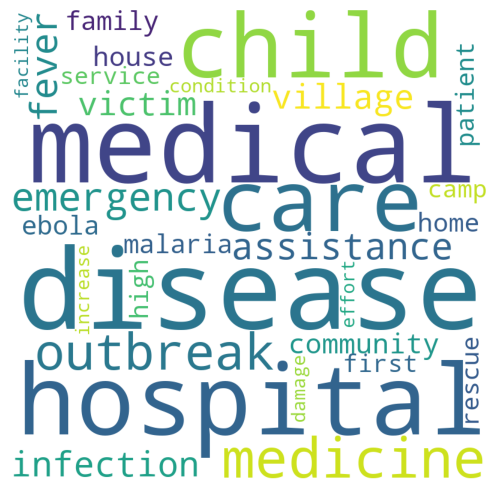

In [1605]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_train_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

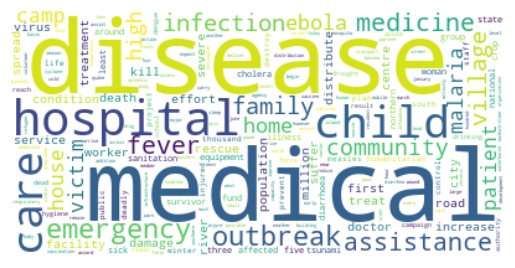

In [1606]:
# Train word_cloud
plt.imshow(wordcloud_train, interpolation='bilinear')
plt.axis("off")
plt.show()

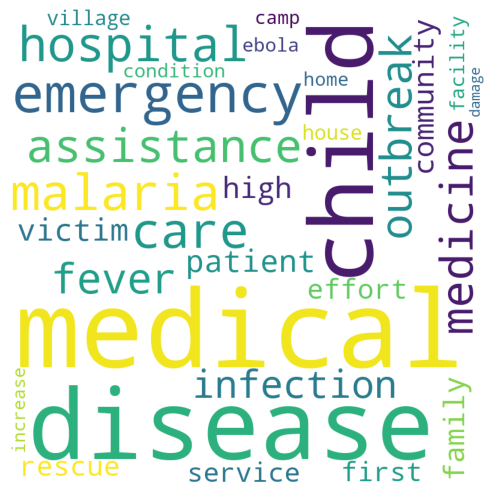

In [1607]:
# create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(tfidf_df_test_matrix.sum(axis=0))
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

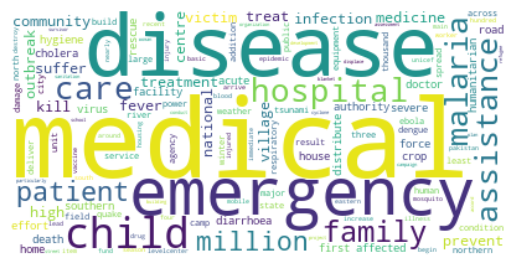

In [1608]:
# Train word_cloud
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.show()

In [1609]:
df_train_pos = df_train[df_train['Medical_severity']=="1"]
df_train_neg = df_train[df_train['Medical_severity']=="0"]


In [1610]:
df_train_pos

,ID,Message,Medical_severity,message_cleaned
940,29824,Boko Haram staged its most deadly assault on t...,1,boko haram stag deadly assault town course hou...
577,26601,Soliders and health officials stepped up anti-...,1,soliders step antiepidemic outbreak conjunctiv...
808,28534,Most had sustained minor injuries due to falli...,1,sustain minor injury fall object discharge tre...
1393,19351,"But through emergency cash distributions, Merc...",1,emergency cash distribution mercy whose disrup...
1646,22051,The IAEA also is developing an African regiona...,1,iaea develop african regional project strength...
...,...,...,...,...
148,3661,"Haiti (Miragoane). If it was for those people,...",1,miragoane misery kill must distribute city cap...
1557,21167,I am glad that CMC was able to assist the team...,1,glad assist appropriate activity beginning out...
643,27193,Contaminated water sources have now been seale...,1,contaminated source seal prevent disease sprea...
910,29556,"During 2002, in addition to the regular SFP, t...",1,addition regular child nutrition component cat...


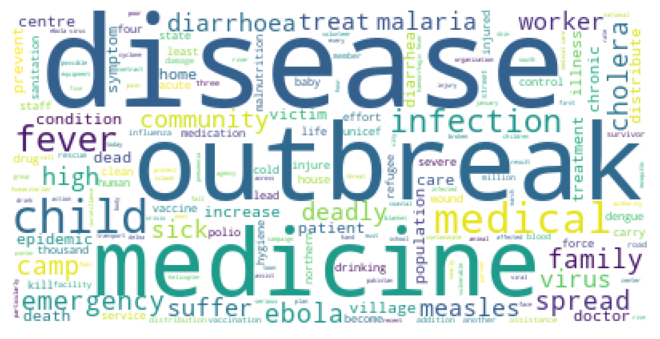

In [1611]:
# create a wordcloud
text = ' '.join(df_train_pos['message_cleaned'])
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

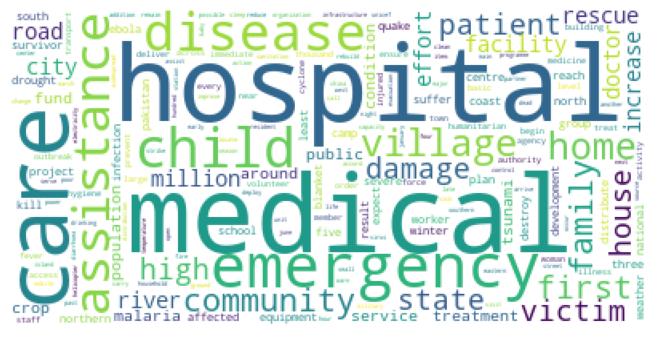

In [1612]:
# create a wordcloud
text = ' '.join(df_train_neg['message_cleaned'])
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_4736\3520395078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_pos['tokens'] = df_train_pos['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
C:\Users\acer\AppData\Local\Temp\ipykernel_4736\3520395078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_pos['bigram'] = df_train_pos['tokens'].apply(lambda x: list(nltk.bigrams(x)))


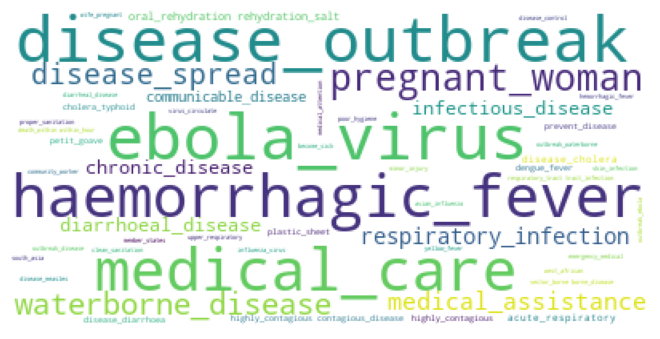

In [1613]:
# create a wordcloud
df_train_pos['tokens'] = df_train_pos['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
df_train_pos['bigram'] = df_train_pos['tokens'].apply(lambda x: list(nltk.bigrams(x)))

bigrams = [bigrams for sublist in df_train_pos['bigram'] for bigrams in sublist]
text = ' '.join('_'.join(bigram) for bigram in bigrams)
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_4736\3009734418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_neg['tokens'] = df_train_neg['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
C:\Users\acer\AppData\Local\Temp\ipykernel_4736\3009734418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_neg['bigram'] = df_train_neg['tokens'].apply(lambda x: list(nltk.bigrams(x)))


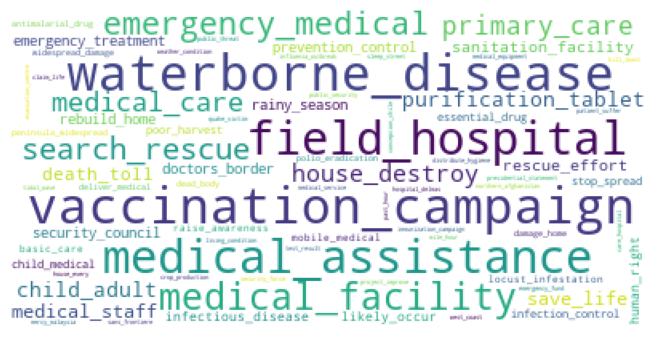

In [1614]:
# create a wordcloud
df_train_neg['tokens'] = df_train_neg['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
df_train_neg['bigram'] = df_train_neg['tokens'].apply(lambda x: list(nltk.bigrams(x)))

bigrams = [bigrams for sublist in df_train_neg['bigram'] for bigrams in sublist]
text = ' '.join('_'.join(bigram) for bigram in bigrams)
wordcloud = WordCloud(background_color='white').generate(text)
# plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [1615]:
tfidf_df_train_matrix.head(3)


,assistance,camp,care,child,community,condition,damage,disease,ebola,effort,...,infection,malaria,medical,medicine,outbreak,patient,rescue,service,victim,village
0,0.0,0.780425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# BIGRAMS

In [1616]:
df_train['tokens'] = df_train['message_cleaned'].apply(lambda x: nltk.word_tokenize(x.lower()))
df_train['bigram'] = df_train['tokens'].apply(lambda x: list(nltk.bigrams(x)))


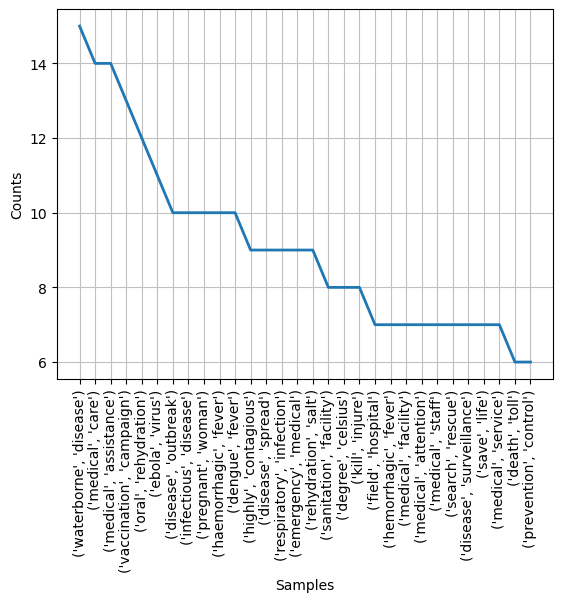

In [1617]:
bigrams = [bigrams for sublist in df_train['bigram'] for bigrams in sublist]
fdist = nltk.FreqDist(bigrams)
fdist.plot(30, cumulative=False)
plt.show()

# TRIGRAMS

In [1618]:
df_train['trigram'] = df_train['tokens'].apply(lambda x: list(nltk.trigrams(x)))


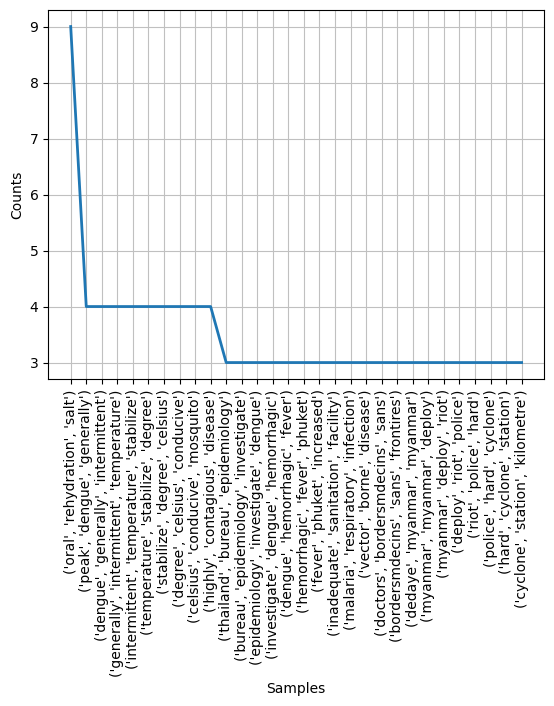

In [1619]:
trigrams = [trigrams for sublist in df_train['trigram'] for trigrams in sublist]
fdist = nltk.FreqDist(trigrams)
fdist.plot(30, cumulative=False)
plt.show()

# 4-grams words

In [1620]:
df_train['fourgram'] = df_train['tokens'].apply(lambda x: list(nltk.ngrams(x, 4)))

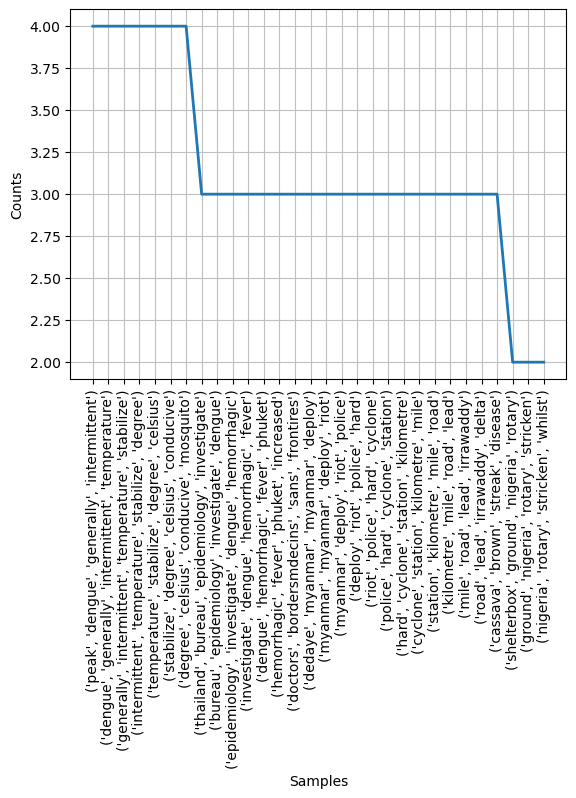

In [1621]:
fourgrams = [fourgrams for sublist in df_train['fourgram'] for fourgrams in sublist]
fdist = nltk.FreqDist(fourgrams)
# print(fourgrams)
fdist.plot(30, cumulative=False)
plt.show()

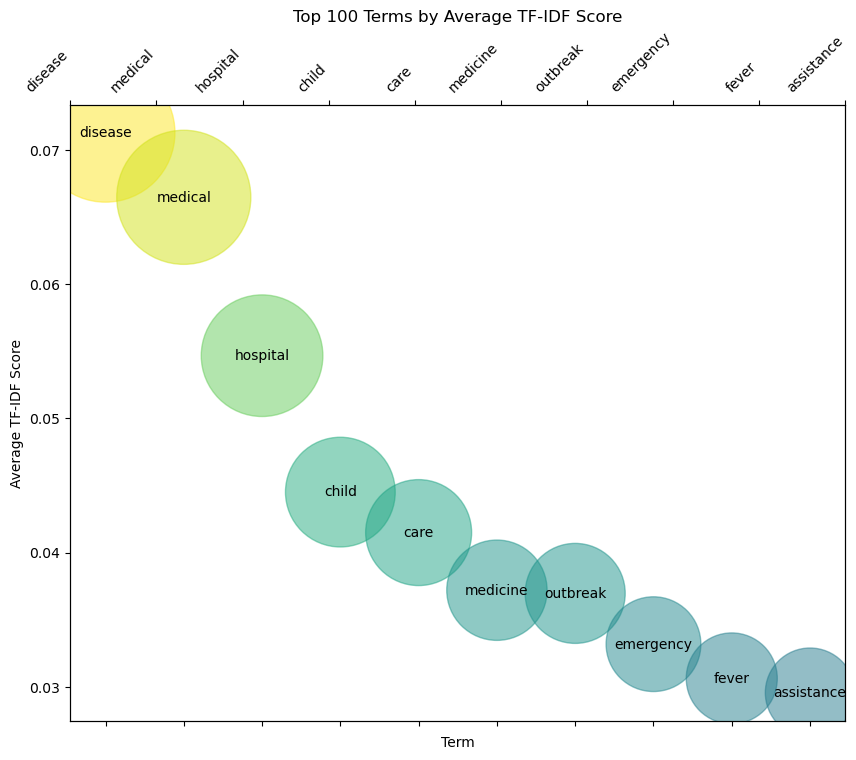

In [1622]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean TF-IDF scores for each term
term_means = np.mean(tfidf_df_train_matrix, axis=0)

# Sort the terms in descending order by their mean TF-IDF scores
sorted_indices = np.argsort(term_means)[::-1][:10]
sorted_means = term_means[sorted_indices]
sorted_terms = [tfidf_vectorizer.get_feature_names_out()[i] for i in sorted_indices]

# Create a bubble chart of the top 100 terms
fig, ax = plt.subplots(figsize=(10, 8))
x = range(len(sorted_terms))
y = sorted_means
sizes = 10000 * sorted_means / np.max(sorted_means)  # calculate size proportional to term means
colors = plt.cm.viridis(sorted_means / np.max(sorted_means))  # map sizes to colors
ax.scatter(x, y, s=sizes, alpha=0.5, c=colors)

# Add text inside the bubbles
for i, term in enumerate(sorted_terms):
    ax.text(i, sorted_means[i], term, ha='center', va='center')

# Set the axis labels and title
ax.set_xlabel("Term")
ax.set_ylabel("Average TF-IDF Score")
ax.set_title("Top 100 Terms by Average TF-IDF Score")

# Set the x-tick labels
ax.set_xticks(x)
ax.set_xticklabels([''] * len(sorted_terms))  # hide the x-tick labels

# Add the word names as a separate axis below the chart
ax2 = ax.twiny()
ax2.set_xticks(x)
ax2.set_xticklabels(sorted_terms, rotation=45, ha='right')

# Show the plot
plt.show()


***III. Machine learning***

***1. Prepare data***

In [1623]:
df_train

,ID,Message,Medical_severity,message_cleaned,tokens,bigram,trigram,fourgram
1628,21850,If the residents of these camps are left once ...,0,resident camp function hospital overworked doc...,"[resident, camp, function, hospital, overworke...","[(resident, camp), (camp, function), (function...","[(resident, camp, function), (camp, function, ...","[(resident, camp, function, hospital), (camp, ..."
940,29824,Boko Haram staged its most deadly assault on t...,1,boko haram stag deadly assault town course hou...,"[boko, haram, stag, deadly, assault, town, cou...","[(boko, haram), (haram, stag), (stag, deadly),...","[(boko, haram, stag), (haram, stag, deadly), (...","[(boko, haram, stag, deadly), (haram, stag, de..."
1991,134,I woul like to know if aide is only available ...,0,woul aide available badly,"[woul, aide, available, badly]","[(woul, aide), (aide, available), (available, ...","[(woul, aide, available), (aide, available, ba...","[(woul, aide, available, badly)]"
872,16870,Rescue workers said the death toll could rise ...,0,rescue worker death toll rise medical emergenc...,"[rescue, worker, death, toll, rise, medical, e...","[(rescue, worker), (worker, death), (death, to...","[(rescue, worker, death), (worker, death, toll...","[(rescue, worker, death, toll), (worker, death..."
577,26601,Soliders and health officials stepped up anti-...,1,soliders step antiepidemic outbreak conjunctiv...,"[soliders, step, antiepidemic, outbreak, conju...","[(soliders, step), (step, antiepidemic), (anti...","[(soliders, step, antiepidemic), (step, antiep...","[(soliders, step, antiepidemic, outbreak), (st..."
...,...,...,...,...,...,...,...,...
1557,21167,I am glad that CMC was able to assist the team...,1,glad assist appropriate activity beginning out...,"[glad, assist, appropriate, activity, beginnin...","[(glad, assist), (assist, appropriate), (appro...","[(glad, assist, appropriate), (assist, appropr...","[(glad, assist, appropriate, activity), (assis..."
643,27193,Contaminated water sources have now been seale...,1,contaminated source seal prevent disease sprea...,"[contaminated, source, seal, prevent, disease,...","[(contaminated, source), (source, seal), (seal...","[(contaminated, source, seal), (source, seal, ...","[(contaminated, source, seal, prevent), (sourc..."
910,29556,"During 2002, in addition to the regular SFP, t...",1,addition regular child nutrition component cat...,"[addition, regular, child, nutrition, componen...","[(addition, regular), (regular, child), (child...","[(addition, regular, child), (regular, child, ...","[(addition, regular, child, nutrition), (regul..."
84,2548,Excuse me. I saw your live in Leognae Haiti in...,1,excuse leognae guerin states navy american bas...,"[excuse, leognae, guerin, states, navy, americ...","[(excuse, leognae), (leognae, guerin), (guerin...","[(excuse, leognae, guerin), (leognae, guerin, ...","[(excuse, leognae, guerin, states), (leognae, ..."


In [1624]:
df_test

,ID,Message,Medical_severity,message_cleaned
1426,19714,"Early in the morning on January 17, Mount Nyir...",0,early january mount nyiragongo eastern congo b...
1620,21784,"Some 500,000 people were evacuated because of ...",1,evacuate landslide capsized boat illness
204,4362,"Good evening, I am in Leogane in a temporary S...",0,evening leogane dampus route marines base hare...
190,4205,requesting power and financial support for vic...,0,request power financial victim roche
350,7148,Is Latortue not in Haiti. We've gotten no help...,0,latortue weve
...,...,...,...,...
1810,29128,"Emergency teams immediately provided shelter, ...",1,emergency immediately medical assistance psych...
514,25837,Activities to increase health awareness and re...,0,activities increase awareness reduce morbidity...
1065,18919,"The first day we had four outpatients, yesterd...",0,first four outpatient yesterday rise today lun...
415,9014,NOTES: it's important because the people attra...,0,attrap virus careless


In [1634]:
import sklearn
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer 


X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

In [1635]:
feature_vec = TfidfVectorizer(max_features= 500, ngram_range= (1, 3), stop_words= 'english') # Load the tf-idf vectorizer from sklearn
X_train = feature_vec.fit_transform(X_train).toarray()# Fit the vectorizer on the train data
X_test = feature_vec.transform(X_test).toarray() #transform the fit vector of train into unseen test data
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [1636]:
# Extract the vocabulary from the vectorizer
vocab = feature_vec.vocabulary_
print(f"Number of terms in the vocabulary = {len(vocab)}")

Number of terms in the vocabulary = 500


In [1637]:
# Display a sample of the word => value mapping
print("Sample Mapping")
for idx, ele in enumerate(zip(vocab.keys(), vocab.values())):
    word, val = ele
    print(f"{word} => {val}")
    if idx == 4: break

Sample Mapping
resident => 373
camp => 50
hospital => 194
doctor => 126
illness => 206


***2. Logistic regression***

In [1629]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate
import matplotlib.pyplot as plt

In [1630]:
def get_score_values(scores):
    print("Precision Score: " + str(scores['test_precision'].mean()) + " +- " + str(2*scores['test_precision'].std()))
    print("Recall Score: " + str(scores['test_recall'].mean()) + " +- " + str(2*scores['test_recall'].std()))
    print("F1 Score: " + str(scores['test_f1'].mean()) + " +- " + str(2*scores['test_f1'].std()))
    print("Accuracy Score: " + str(scores['test_accuracy'].mean()) + " +- " + str(2*scores['test_f1'].std()))

In [1631]:
def cross_val_prediction_report(model_name, X_train, y_train):
    model = model_name
    model.fit(X_train, y_train)
    # convert '0' and '1' to 0 and 1
    y_train = [int(label) for label in y_train]
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    scoring = ['precision', 'recall', 'f1', 'accuracy']
    print("-"*55)
    print("CROSS VALIDATION SCORES FOR: " + str(model_name))
    print("-"*55)
    cross_val = pd.DataFrame(cross_validate(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1))
    get_score_values(cross_val)

models = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), MultinomialNB(), SVC()]
for model_name in models:
    cross_val_prediction_report(model_name, X_train, y_train)

-------------------------------------------------------
CROSS VALIDATION SCORES FOR: LogisticRegression()
-------------------------------------------------------
Precision Score: 0.7613044840079086 +- 0.11485321665715062
Recall Score: 0.48743169398907105 +- 0.16191756714176817
F1 Score: 0.5904969838510129 +- 0.13488885315034763
Accuracy Score: 0.7432712722521639 +- 0.13488885315034763
-------------------------------------------------------
CROSS VALIDATION SCORES FOR: RandomForestClassifier()
-------------------------------------------------------
Precision Score: 0.6788025885201247 +- 0.10394924473282317
Recall Score: 0.6172950819672132 +- 0.1077995106816509
F1 Score: 0.6443129534423973 +- 0.0694106622522474
Accuracy Score: 0.7381022374652948 +- 0.0694106622522474
-------------------------------------------------------
CROSS VALIDATION SCORES FOR: DecisionTreeClassifier()
-------------------------------------------------------
Precision Score: 0.6356933586185256 +- 0.09884339673073117

SINCE RANDOM FOREST LOOKS LIKE A GOOD MODEL COMPARED TO OTHERS, IT CAN BE FURTHER TUNED FOR ITS DIFFERENT PARAMETERS.

In [1632]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

feature_vec = TfidfVectorizer(max_features=100) # Load the tf-idf vectorizer from sklearn
rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())
])
rf_pipe.fit(X_train, y_train)

tf_params = {
 'tvec__max_features':[500, 600, 700, 800, 900],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2), (1, 3), (2, 3)],
 'tvec__stop_words': [None, 'english'],
 
}

In [1070]:
rf_gs = GridSearchCV(rf_pipe, param_grid=tf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'tvec__max_features': 500, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.743388290379541


In [1093]:
# Setting up randomforest params
rf_params = {
 'tvec__max_features': [500],
 'tvec__ngram_range': [(1,3)],
 'tvec__stop_words': ['english'],
 'rf__bootstrap': [True, False],
 'rf__max_depth': [5, 10, 15]
#  'rf__max_features': ['auto', 'sqrt'],
#  'rf__min_samples_leaf': [1, 2, 4],
#  'rf__min_samples_split': [2, 5, 10],
#  'rf__n_estimators': [200, 400, 600, 800, 1000]
}

In [1096]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'rf__bootstrap': True, 'rf__max_depth': 15, 'tvec__max_features': 500, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.7137491815963336


In [1108]:
rf_params = {
 'tvec__max_features': [500],
 'tvec__ngram_range': [(1,3)],
 'tvec__stop_words': ['english'],
 'rf__bootstrap': [True],
 'rf__max_depth': [15],
 'rf__max_features': ['auto', 'sqrt'],
 'rf__min_samples_leaf': [1, 2, 4, 10, 20]
#  'rf__min_samples_split': [2, 5, 10],
#  'rf__n_estimators': [200, 400, 600, 800, 1000],
#  'rf__criterion': ['gini', 'entropy', 'logloss']
}

In [1109]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'tvec__max_features': 500, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.7225780211495347


In [1111]:
rf_params = {
 'tvec__max_features': [500],
 'tvec__ngram_range': [(1,3)],
 'tvec__stop_words': ['english'],
 'rf__bootstrap': [True],
 'rf__max_depth': [15],
 'rf__max_features': ['sqrt'],
 'rf__min_samples_leaf': [4],
 'rf__min_samples_split': [2, 5, 10],
 'rf__n_estimators': [200, 400, 600, 800, 1000]
#  'rf__criterion': ['gini', 'entropy', 'logloss']
}

In [1112]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'rf__bootstrap': True, 'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 400, 'tvec__max_features': 500, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.7206852766700395


In [1114]:
rf_params = {
 'tvec__max_features': [500],
 'tvec__ngram_range': [(1,3)],
 'tvec__stop_words': ['english'],
 'rf__bootstrap': [True],
 'rf__max_depth': [15],
 'rf__max_features': ['sqrt'],
 'rf__min_samples_leaf': [4],
 'rf__min_samples_split': [1],
 'rf__n_estimators': [400],
 'rf__criterion': ['gini', 'entropy', 'logloss']
}

In [1115]:
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
print(rf_gs.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\acer\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\acer\AppData\Roaming\Python\

{'rf__bootstrap': True, 'rf__criterion': 'gini', 'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 400, 'tvec__max_features': 500, 'tvec__ngram_range': (1, 3), 'tvec__stop_words': 'english'}
0.7175326865464358


In [1652]:
X_train = df_train['message_cleaned']
y_train = df_train['Medical_severity']
X_test = df_test['message_cleaned']
y_test = df_test['Medical_severity']

feature_vec = TfidfVectorizer(max_features= 500, ngram_range= (1, 3), stop_words= 'english') 
X_train = feature_vec.fit_transform(X_train).toarray()# Fit the vectorizer on the train data
X_test = feature_vec.transform(X_test).toarray() #transform the fit vector of train into unseen test data
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [1660]:
# model = SVC(kernel='linear', C=3)
# model = RandomForestClassifier( bootstrap= True, max_depth=50,max_features= 'sqrt', min_samples_leaf= 4,
#                                min_samples_split=2, n_estimators = 500)
model = RandomForestClassifier(bootstrap= True, max_depth=50,max_features= 'sqrt', min_samples_leaf= 4,
                               min_samples_split=2, n_estimators = 500)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
# convert '0' and '1' to 0 and 1
pred_train = [int(label) for label in pred_train]
y_train = [int(label) for label in y_train]
pred_test = [int(label) for label in pred_test]
y_test = [int(label) for label in y_test]

print("-"*53)
print("TRAINING SCORES")
print("-"*53)
print(classification_report(y_train, pred_train))
print("-"*53)
print("TEST SCORES")
print("-"*53)
print(classification_report(y_test, pred_test))
print("-"*53)

-----------------------------------------------------
TRAINING SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       961
           1       0.85      0.71      0.77       601

    accuracy                           0.84      1562
   macro avg       0.84      0.82      0.83      1562
weighted avg       0.84      0.84      0.84      1562

-----------------------------------------------------
TEST SCORES
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.85      0.79       321
           1       0.68      0.52      0.59       200

    accuracy                           0.72       521
   macro avg       0.71      0.68      0.69       521
weighted avg       0.72      0.72      0.71       521

-----------------------------------------------------


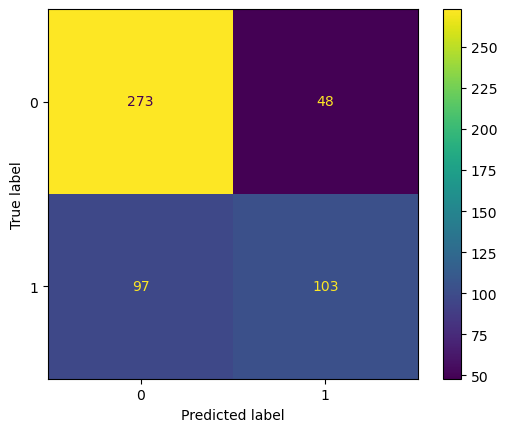

In [1661]:
# Obtain the confusion matrix
cm = confusion_matrix(y_test, pred_test)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [459]:
# model = RandomForestClassifier(bootstrap= True, max_depth= 15, max_features= 'auto',
#                                min_samples_leaf= 10, min_samples_split= 5, n_estimators= 1000)
from sklearn.svm import SVC
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('pca', PCA()), ('svm', SVC())])
param = {
    'pca__n_components': [2,3],
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': [0.1,1,10],
    'svm__gamma': [0.01, 0.1, 1]
}

grid = GridSearchCV(pca_pipeline, param, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.6221653473007559
{'pca__n_components': 2, 'svm__C': 0.1, 'svm__gamma': 0.01, 'svm__kernel': 'linear'}


In [ ]:
# Load the model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = lr_model.predict(X_val)

# convert '0' and '1' to 0 and 1
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_val, pred_val, pos_label=1)
recall = recall_score(y_val, pred_val, pos_label=1)
f1 = f1_score(y_val, pred_val, pos_label=1)

print("Precision: "+str(precision))
print("Recall: "+str(recall))
print("F1: "+str(f1))


In [ ]:
y_scores = lr_model.predict_proba(X_val)[:, 1] # Probability of the positive class

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
import matplotlib.pyplot as plt

# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Obtain the coefficients of the logistic regression model
coefficients = lr_model.coef_[0]

# Sort the coefficients in descending order
sorted_coefficients = sorted(zip(coefficients, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_coefficients = sorted_coefficients[:k]
top_features = [feature for coef, feature in top_coefficients]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_coefficients])
ax.set_title("Top Coefficients in Logistic Regression Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
top_coefficients

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Combine the coefficients and feature names into a dictionary
word_scores = dict(zip(feature_names, coefficients))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_scores)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

***3. Random Forest***

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split # package training and test data spilt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # package for random classifier
from sklearn.pipeline import make_pipeline # package for pipeline

In [ ]:
model = RandomForestClassifier() # assign random classifier (black box) as a prediction model
model.fit(X_train, y_train) # fit the training and test data into the prediction model

In [ ]:
# Obtain the predictions for the validation data
rf_pred_val = model.predict(X_val)

In [ ]:

# convert '0' and '1' to 0 and 1
rf_pred_val = [int(label) for label in rf_pred_val]

In [ ]:
# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice

results = classification_report(y_true=y_val, y_pred=rf_pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


print(classification_report(y_val, rf_pred_val))


In [ ]:
y_scores = model.predict_proba(X_val)[:, 1] # Probability of the positive class

In [ ]:
# convert '0' and '1' to 0 and 1
y_val = [int(label) for label in y_val]


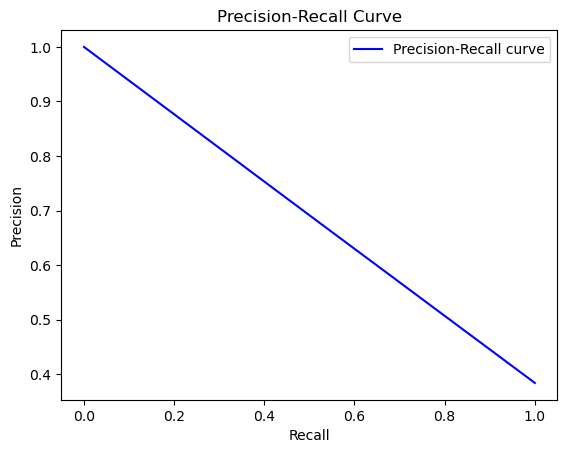

In [1664]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_test, pred_test)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

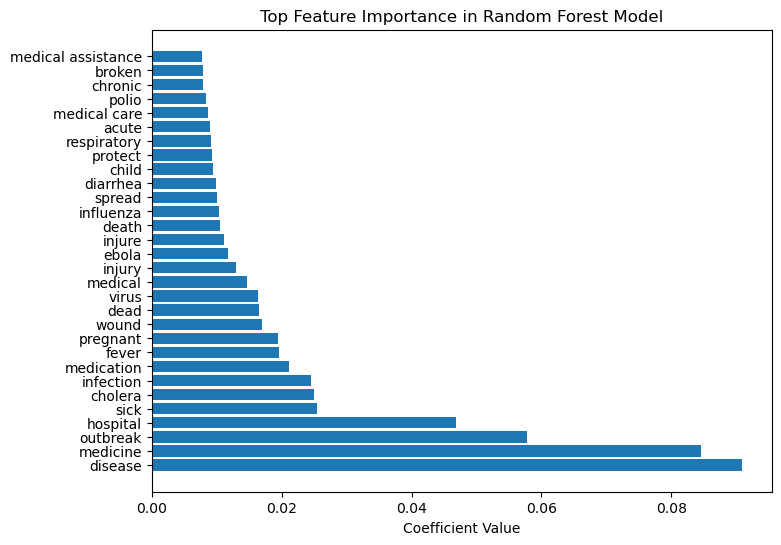

In [1666]:
# Obtain the feature names from the vectorizer
feature_names = feature_vec.get_feature_names_out()
# Generate feature importance plot
importances = model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Random Forest Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
top_importances

In [ ]:
words = [pair[1] for pair in top_importances]

In [ ]:
# Generate feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Based on the feature importance values you provided, we can see that "disease" and "medicine" are the two most important features for determining if the text relates to medical. Therefore, we can increase the weights of the terms "cancer" and "heart disease" to reflect their importance

***4. Decision Tree***

In [ ]:
# Import the necessary libraries

from sklearn.tree import DecisionTreeClassifier # Decision Tree Model for Classification

In [ ]:
# Load the model
dt_model = DecisionTreeClassifier()

# Fit the model
dt_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = dt_model.predict(X_val)

# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
y_pred = [int(label) for label in pred_val]
results = classification_report(y_true=y_val, y_pred=y_pred, output_dict=True, zero_division=0) # Use zero_devision to control warnings

print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
pred_val=np.array([int(x) for x in pred_val])

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming you have y_true and y_scores from your model
precision, recall, thresholds = precision_recall_curve(y_val, y_scores)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', label='Precision-Recall curve')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
# Obtain the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()
# Generate feature importance plot
importances = dt_model.feature_importances_
# Sort the coefficients in descending order
sorted_importances= sorted(zip(importances, feature_names), reverse=True)

# Extract the top k coefficients and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in Decision tree Model")
ax.set_xlabel("Coefficient Value")
plt.show()

In [ ]:
# Generate feature importance plot
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = vectorizer.get_feature_names_out()
# Generate a dictionary with words and their importances
word_importances = {}
for i in range(len(indices)):
    word_importances[features[indices[i]]] = importances[indices[i]]

# Create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_importances)

# Display the wordcloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

***5. SVM***

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Load the model
svc_model = SVC(C=0.5, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
print(classification_report(y_val, rf_pred_val))

In [ ]:
# Load the model
svc_model = SVC(C=1, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
print(classification_report(y_val, rf_pred_val))

In [ ]:
# Load the model
svc_model = SVC(C=1.5, kernel='rbf')

# Fit the model
svc_model.fit(X=X_train, y=y_train)

# Obtain the predictions for the validation data
pred_val = svc_model.predict(X_val)

# We choose accuracy and weighted average f1-score as our metrics of choice
pred_val = [int(label) for label in pred_val]
y_val = [int(label) for label in y_val]


# Get the classification report for the prediction
# It is a dictionary that contains various metrics and their values
# We choose accuracy and weighted average f1-score as our metrics of choice
results = classification_report(y_true=y_val, y_pred=pred_val, output_dict=True, zero_division=0) # Use zero_devision to control warnings


print(f"Accuracy = {results['accuracy']*100:>.2f} %")
print(f"Weighted Avg F1-score = {results['weighted avg']['f1-score']:>.4f}")

In [ ]:
# Obtain the confusion matrix
cm = confusion_matrix(y_val, pred_val)

# Uncomment the following line to just print the matrix to the standard output
# print(cm)

cm_display = ConfusionMatrixDisplay(cm) # Initiate a ConfusionMatrixDisplay object
cm_display.plot() # Plot the object
plt.show() # Display the plot

In [ ]:
print(classification_report(y_val, rf_pred_val))

In [ ]:
from sklearn.inspection import permutation_importance
# Compute permutation feature importances
result = permutation_importance(svc_model, X_test, y_test, n_repeats=2, random_state=0)
importances = result.importances_mean

# Sort the importances in descending order
sorted_importances = sorted(zip(importances, feature_names), reverse=True)

# Extract the top k feature importance and their corresponding feature names
k = 30
top_importances = sorted_importances[:k]
top_features = [feature for coef, feature in top_importances]

# Plot the top k coefficients and their corresponding feature names
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_features, [coef for coef, feature in top_importances])
ax.set_title("Top Feature Importance in SVM Model")
ax.set_xlabel("Importance Score")
plt.show()

***6. Model Comparision***

*After training the models using the training set and validating them during training using validation set, now we compare the models using the testing set.*

In [ ]:
print("Model \t Accuracy \t Weighted Avg F1-score")
print("-----------------------------------------------")

# Logistic Regression
pred_test = lr_model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"LR \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")

# Decision Tree
pred_test = dt_model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"DT \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")

# Support Vector Machine
pred_test = svc_model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"SVM \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")

# Random Forest:

pred_test = model.predict(X_test)
results = classification_report(y_true=y_test, y_pred=pred_test, output_dict=True, zero_division=0)
print(f"Random Forest \t {results['accuracy']*100:>.2f} % \t {results['weighted avg']['f1-score']:>.4f}")


In [136]:
# # https://www.kaggle.com/code/neerajmohan/nlp-text-classification-using-tf-idf-features 
#LINK FOR PERFORMING CORRECT WAY OF PREDICTION USING NLP FEATURES
# https://towardsdatascience.com/nlp-with-pipeline-gridsearch-5922266e82f4
# Referecne for pipeline using rf